In [2]:
%matplotlib inline
import numpy as np
import time
from linear_solvers import NumPyLinearSolver, HHL
from qiskit.quantum_info import Statevector
from qiskit import *
from qiskit.tools.visualization import plot_histogram


def get_solution_vector(solution):
    """Extracts and normalizes simulated state vector
    from LinearSolverResult."""
    solution_vector = Statevector(solution.state).data[16:18].real
    norm = solution.euclidean_norm
    return norm * solution_vector / np.linalg.norm(solution_vector)


Naive Solution
 -0.33062052726745605 seconds
 {   'circuit_results': None,
    'euclidean_norm': 1.1858541225631376,
    'observable': None,
    'state': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7fe45df91f50>}
naive raw solution vector: [0.75+3.47755428e-16j 0.25+1.16143956e-16j]
full naive solution vector: [1.125 0.375]


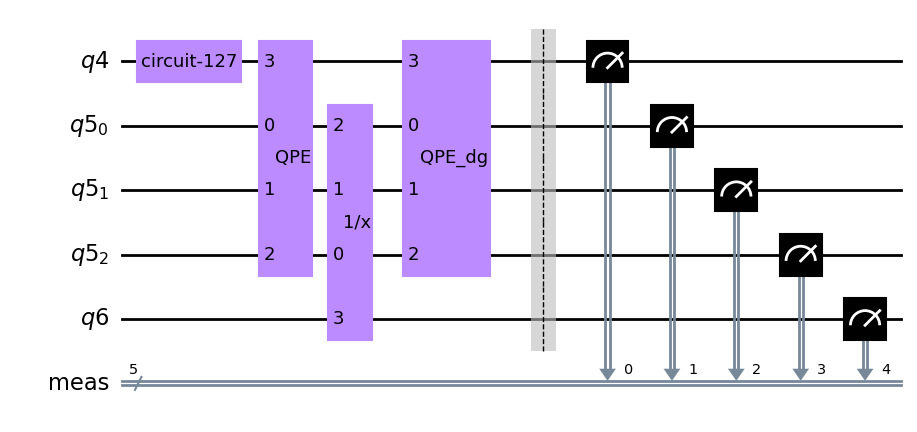

In [2]:
matrix = np.array([ [1, -1/3], [-1/3, 1] ])
vector = np.array([1, 0])

start_time = time.time()
naive_hhl_solution = HHL().solve(matrix, vector)
end_time = time.time()
print('Naive Solution\n', start_time - end_time, 'seconds\n', naive_hhl_solution)

naive_sv = Statevector(naive_hhl_solution.state).data
naive_full_vector = np.array([naive_sv[16], naive_sv[17]])

# Raw vector = components expressed complex numbers
# Full vector = components expressed in the real numbers
print('naive raw solution vector:', naive_full_vector)
print('full naive solution vector:', get_solution_vector(naive_hhl_solution))
naive_hhl_solution.state.measure_all()
naive_hhl_solution.state.draw(output='mpl')


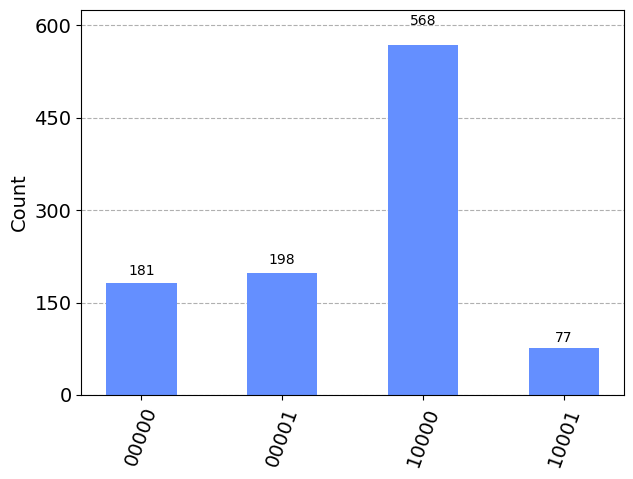

In [3]:
simulator = Aer.get_backend('statevector_simulator')
res = execute(naive_hhl_solution.state, backend=simulator, shots=1024).result()
plot_histogram(res.get_counts())

In [4]:
start_time = time.time()
classical_solution = NumPyLinearSolver().solve(matrix,
                                               vector/np.linalg.norm(vector))
end_time = time.time()
print('Classical Solution', start_time - end_time, 'seconds\n', classical_solution.state)


Classical Solution -0.0004253387451171875 seconds
 [1.125 0.375]


In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator

service = QiskitRuntimeService()
# backend = service.least_busy(simulator=False, operational=True)
backend = service.get_backend('ibm_osaka')
# backend = service.get_backend('ibmq_qasm_simulator')
qc = naive_hhl_solution.state
layout = [8, 19, 31, 32, 42]
qc = transpile(qc, backend=backend, initial_layout=layout)

In [12]:
sampler = Sampler(backend=backend)
job = sampler.run(qc, shots=1024)
print(job.job_id())

cnnzz8de4ks0008gng20


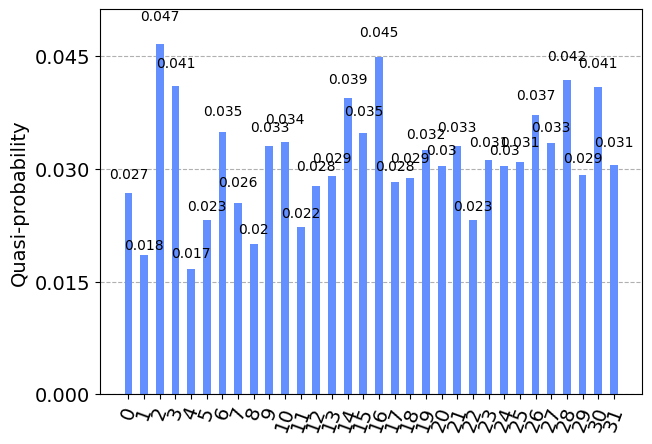

In [6]:
# Archived Quasi Probability Dict from previous job (id: cnnzz8de4ks0008gng20)
quasi_dict = quasi_dists={0: 0.026816072928972864, 1: 0.018490594693250872, 2: 0.046570564101242544, 3: 0.04107133415549088, 4: 0.016749578270066467, 5: 0.023214930969451684, 6: 0.03490553564526238, 7: 0.02552901301890591, 8: 0.019957024407244103, 9: 0.03305753096195976, 10: 0.03356502520856777, 11: 0.02224135271439495, 12: 0.02775539881074262, 13: 0.029114614955293345, 14: 0.03938703901202999, 15: 0.03478158436165445, 16: 0.04483869232423295, 17: 0.028249738003587925, 18: 0.028775613821058768, 19: 0.032471550921759684, 20: 0.030433041902497193, 21: 0.0330443970130198, 22: 0.023255258878468788, 23: 0.031235285134083884, 24: 0.03043196868963789, 25: 0.03087594594681064, 26: 0.03721907068706451, 27: 0.033471233540531546, 28: 0.04186878928002939, 29: 0.02914345380238617, 30: 0.04088982907239548, 31: 0.030588936767904803}
plot_histogram(quasi_dict)